In [192]:
#School computers have local access to a limited number of packages, this appends access to additional packages (including bs4)
import sys
sys.path.append(r'R:\JoePriceResearch\Python\Anaconda3\Lib\site-packages')

#imports I use throughout my assignment
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import requests
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup
from scipy import stats


In [9]:
#Chooses the working directory
os.chdir(r"C:\Users\josephwy\Documents")

# Bigfoot Sightings Data

I found a dataset that includes roughly 5000 bigfoot sightings from around the United States on https://data.world/timothyrenner/bfro-sightings-data. I downloaded it in a json format. 


## Upload Data

When I tried to upload the data, I found that python was unable to read it. 

## Incomplete Json

I spent quite a bit of time trying to determine the nature of the problem. After some research and inspection of the file, I found that it was not in proper json format. The file was lacking brackets around the data, and commas between each braced region. 

## Repair Json file

I wrote the following code to repair the data:

In [ ]:
with open(r"bfro_reports.txt", "r+") as f:
    #creates a list comprised of each braced line in the json
    mylist= list(f)
    newlist = []
    #iterates through mylist, eliminating trailing whitespace and adding a comma at the end
    for line in mylist:
        line = line.strip() + ","
        print(line)
        #directs the new comma seperated lines into newlist to be joined into a text file
        newlist.append(line)
    f = str().join(newlist)
    #writes the formatted text to a json file
    with open(r"big_foot_data.json", "w") as bf:
        bf.write(f)

## Upload Round Two

It worked this time! 

In [12]:
with open(r"big_foot_data.json", "r") as f:      
    bf_data = json.load(f)
    bf_df = pd.DataFrame(bf_data)    

## Data Overview
Here are the headers for each data category within the file

In [13]:
 print(bf_df.head())

                                        ALSO_NOTICED A_&_G_References  \
0                                                NaN              NaN   
1  My friend noted that he had spent the night be...              NaN   
2  Not sure. It took me a full 5 years to be able...              NaN   
3  I remember thinking that the pavement would be...              NaN   
4                                                NaN              NaN   

                           COUNTY DATE  \
0  Valdez-Chitina-Whittier County  NaN   
1                     York County  NaN   
2                  Yamhill County  NaN   
3                  Washita County   28   
4               Washington County  NaN   

                                         ENVIRONMENT  \
0                                                NaN   
1                                                NaN   
2  Gravel logging road. Very dense fir forests. B...   
3  Barb wire fenced cattle pasture, mostly grassy...   
4  My friend's parents Mobil

## Information of Interest

After scanning through the data, I decided that the most valuable information would be the locations and dates of the sightings. I did't have the time or the interest to read all of the first hand accounts. 

In [14]:
#provides a count of each populated cell by state groupings
print(bf_df.groupby('STATE').count())


                ALSO_NOTICED  A_&_G_References  COUNTY  DATE  ENVIRONMENT  \
STATE                                                                       
Alabama                   64                 0      91    59           88   
Alaska                    15                 0      20    13           18   
Arizona                   52                 0      84    61           82   
Arkansas                  63                 3      90    58           86   
California               257                23     398   243          361   
Colorado                  67                18     119    80          109   
Connecticut                7                 0      11     6            8   
Delaware                   4                 0       5     4            5   
Florida                  184                 0     283   199          271   
Georgia                   91                 4     121    93          115   
Idaho                     43                 0      70    48           66   

In [18]:
#checks to ensure that all 50 states are represented
bf_df["STATE"].value_counts()
print(len(bf_df["STATE"].unique()))

50


## States Data in good shape

The states data all seemed pretty standardized and reasonable-- there were 50 states listed. This was pretty fortunate. 
Unfortunately, the Year data was a mess. 

In [19]:
#outputs unique values found in the YEAR column
bf_df["YEAR"].value_counts()


2000              182
2012              180
2004              173
2005              169
2006              168
2001              160
2003              143
2008              140
2011              130
2013              127
2002              126
2009              126
1998              123
2007              118
2014              110
2010              110
1997              103
1978               88
1977               83
1996               83
1999               81
1980               80
2015               72
1993               67
1995               66
1994               63
1979               59
1975               58
1986               56
1982               56
                 ... 
1998, 1999          1
1990- 2006          1
1965-66             1
1998 & 1999         1
2008/2009           1
1984 - '94          1
2006-2008           1
1978 or 1979        1
1974 or 1975        1
76                  1
1979/1980           1
1989/90             1
~1970               1
Early 1980s         1
Late 80's 

## Cleaning the YEAR Data

There were 2 problems with the year data:
1. It was far from standardized and incredibly messy.
2. It was in string format and therefore difficult to treat chronologically

I decided to use regular expressions to replace all of the unusual dates I found. 
At the onset it seemed most efficient to just address each variation (such as "85-present") individually. I used the replace command and wrote verbatim regular expressions to match them. This proved to be a miserable experience and took far longer than I anticipated. I should have written a more general code. In any case, my regex replacement is shown below: 

In [ ]:
#cleanup YEAR 
#In cases where multiple dates are listed, I replace with the earliest.
#In the case of an ambiguous range, I replaced with the average
bf_df["YEAR"].replace(regex={r"^2000-2003" : "2002", "^1977 or 78": "1977",
     "^1977 or 78$": "1977", "^97-98$": "1977", "^mid 80's$": "1985", 
     "^\'01or \'02$": "2002", "^1980-1999$": "1990", "^04-05$": "2004",
     "^1997/1998$": "1997", "^95-96$": "1995", "^1991/1999$": "1991", 
     "^1947/48$": "1947", "In the 1980's$": "1985", "^1988-1989$" : "1988",
     "^92 or 93$": "1992", "1986- 2008$" : "1997", "^1980-82$" : "1981",
     "^1971 or 72$" : "1971", "2012`$" : "2012", "^Late1960's$" : "1968", 
     "^1956 or 1957$" : "1956", "^1987-88$" : "1987", "^1991-92$" : "1991",
     "^1974-1976$" : "1975", "^1984?$" : "1984", "^near 1983$" : "1983", 
     "^about 1960$" : "1960", "1976-1978$" : "1977", "^1981, 1982$" : "1981",
     "^Late 70s$" : "1978", "79, 80, 99$" : "1980", r"93/95$" : "1993", 
     "^1985 - '87$" : "1986", "72 or 73$" : "1972", "^1971-72$" : "1971",
     "^1998 or 19$" : "1998", "^1989?$" : "1989", "^Early 1980s$" : "^1980",
     "^1994-1997+" : "1994", "^198945/86$" : "1989", "^1994+" : "1994", 
     "^198941, 1982$" : "1982", "^1978-1990$" : "1978", "^2014-2016" : "2014",
     r"^198943/2010" : "1989", "^2005 2009" : "2005", "^198949 &2005" : "1989",
     "^1973 or 74" : "1973", "^1992-3" : "1992", "^1970-1972" : "1970", 
     "^Early 1990's" : "1992", "^198949" : "1989", "^198947" : "1989", 
     "^1978 thru 1982" : "1978", "^1973-'76" : "1973", "^19894[\d]" : "1989", 
     "^app. 1985" : "1985", "^2004-2005" : "2004", "^1959 or 60" : "1959", 
     "^1978-79" : "1978", "^2010/2011" : "2010", "^2008/2009" : "2008", 
     r"^1/5/1998" : "1998", "^1990 appro" : "1990", "^2005-06" : "2005", 
     "^2009-2010" : "2009", "^93-98" : "1993", "^71' or 72'" : "1971", 
     "^1930's" : "1930", "^1994\?" : "1994", "^1976 or 77" : "1976", "mid 1970's" : "1970", 
     "^Late 1980s" : "1988", "^1994[\d]+" : "1994", "^1961 1962" : "1961",
     "^1952 or 1953" : "1952", "^1976-2000-2008" : "1976", "^1989-86" : "1989",
     "^1979 or 80" : "1979", "^2000/2001" : "2000", "^93" : "1993",
     "^2000-2001" : "2000", "^1989,19943" : "1989", "^2001-2004" : "2001",
     "^07" : "2007", "^2002-2003" : "2002", "^119930" : "1993",
     "^119191919932" : "1993", "^202020202007" : "2007", "^119191919930" : "1993",
     "^1919191993" : "1993", "^2020202007" : "2007", "^1989 or '86" : "1989",
     "^11919930" : "1993", "^191993" : "1993", "^1970's-1980's" : "1970", 
     "^1994-2001" : "1994", "^1989 or 1987?" : "1987", 
     "^11919932" : "1993", "^191993" : "1993", "^1978 to 1980" : "1978", 
     "^est mid-70" : "1975", 
     "^About 1977" : "1977", "^" : "", "^" : "", "^" : "", 
     "^" : "", "^" : "", "^" : "", "^" : "", 
     "^" : "", "^" : "", "^" : "", "^" : "", 
     "^" : "", "^" : "", "^" : "", "^" : "",  }, inplace=True)


## Progress Check

I tried to see how many of the 400+ unique "YEAR" listings had been whittled down by my 
superhuman efforts. You can imagine my frustration to see the following:

In [ ]:
print(bf_df["YEAR"].unique())
print(len(bf_df["YEAR"].unique()))

In [ ]:
type(bf_df)

## Desperate times call for desperate measures

I was beyond jaded to find that I had only eliminated 100 of the faulty years.
In a fit of rage, I wrote the following code: 

In [20]:
#drops all missing values in the YEAR column
bf_df = bf_df.dropna(subset=["YEAR"])

In [21]:
#uses a regular expression that matches on 4 consecutive digits (a year,) to identify standardized year entries
good_years = "^[\d]{4}$"
# rewrites the data using only standardized years
bf_df = bf_df[bf_df["YEAR"].str.match(good_years)]

In [22]:
#prints out the new list of unique YEAR entries, as well as the total number of them
print(bf_df["YEAR"].unique())
print(len(bf_df["YEAR"].unique()))

['1984' '1973' '1971' '2003' '1970' '2000' '2016' '1979' '1962' '1988'
 '2006' '2007' '1956' '1989' '2010' '2013' '2011' '1987' '1981' '1977'
 '2009' '1972' '1978' '1990' '1993' '1975' '1986' '1976' '2012' '1969'
 '1983' '2014' '1982' '2001' '2015' '1998' '1994' '1997' '2008' '1966'
 '1960' '1991' '2004' '2005' '1999' '1967' '1954' '1980' '2002' '1974'
 '1932' '1968' '1950' '1965' '1992' '1995' '1985' '1996' '1957' '1958'
 '2017' '1963' '1943' '1942' '1949' '1921' '1964' '1961' '1941' '1910'
 '1944' '1955' '1905' '1930' '1938' '1948' '1890' '1945' '1953' '1937'
 '1925' '1959' '1920' '1870' '1926' '1940']
86


In [23]:
#outputs the distribution of years by number of corresponding entries
bf_df["YEAR"].value_counts()

2000    182
2012    180
2004    173
2005    169
2006    168
2001    160
2003    143
2008    140
2011    130
2013    127
2009    126
2002    126
1998    123
2007    118
2014    110
2010    110
1997    103
1978     88
1996     83
1977     83
1999     81
1980     80
2015     72
1993     67
1995     66
1994     63
1979     59
1975     58
1982     56
1986     56
       ... 
1950      6
1962      6
1958      5
1956      4
1953      4
1960      3
1957      3
1955      3
1949      3
1944      2
1943      2
1920      2
1942      1
1910      1
1959      1
1948      1
1926      1
1921      1
1940      1
1941      1
1930      1
1890      1
1938      1
1954      1
1870      1
1945      1
1925      1
1937      1
1905      1
1932      1
Name: YEAR, Length: 86, dtype: int64

In [24]:
print(len(bf_df.index))

4228


## YEAR Cleaning Continued

At the expense of roughly 800 entries (which is admittedly nontrivial, but also not as bad as wasting 4 more hours on bigfoot data cleaning,) I managed to clear out all those nasty YEAR entries. I rationalize that because the distribution of improper entries was quasi random, and because I was still left with a sizeable dataset following their elimination, this was an appropriate course of action. 

Then I converted the years into integers

In [25]:
#converts YEAR strings into integers
bf_df[['YEAR']] = bf_df[['YEAR']].apply(pd.to_numeric)

To verify that they were in fact integers, I took maxes and mins:


In [26]:
print(bf_df["YEAR"].max())
print(bf_df["YEAR"].min())


2017
1870


## Outliers
Because the only information I'm considering within this particular dataset is state and year, and because all years fall within a reasonable range (none are greater than 2017,) and the 1870 entry is in fact describing a sighting in 1870 (I read the "Observed" entry for that year,) there aren't any outliers.  

## Data Visualization

Then I wanted to visualize bigfoot sightings by state per year. The first scatterplot was illegible:

In [265]:
#defines a scatterplot function
def scatterplot(data, x_column, y_column, x_label, y_label):
    #determines plot dimensions
    plt.figure(figsize=(30,15))
    #determines plot font size
    plt.rcParams.update({'font.size': 25})
    #inputs data and chooses axis
    plt.scatter(x_column, y_column, data=data)
    #populates axis labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()
    
    return 


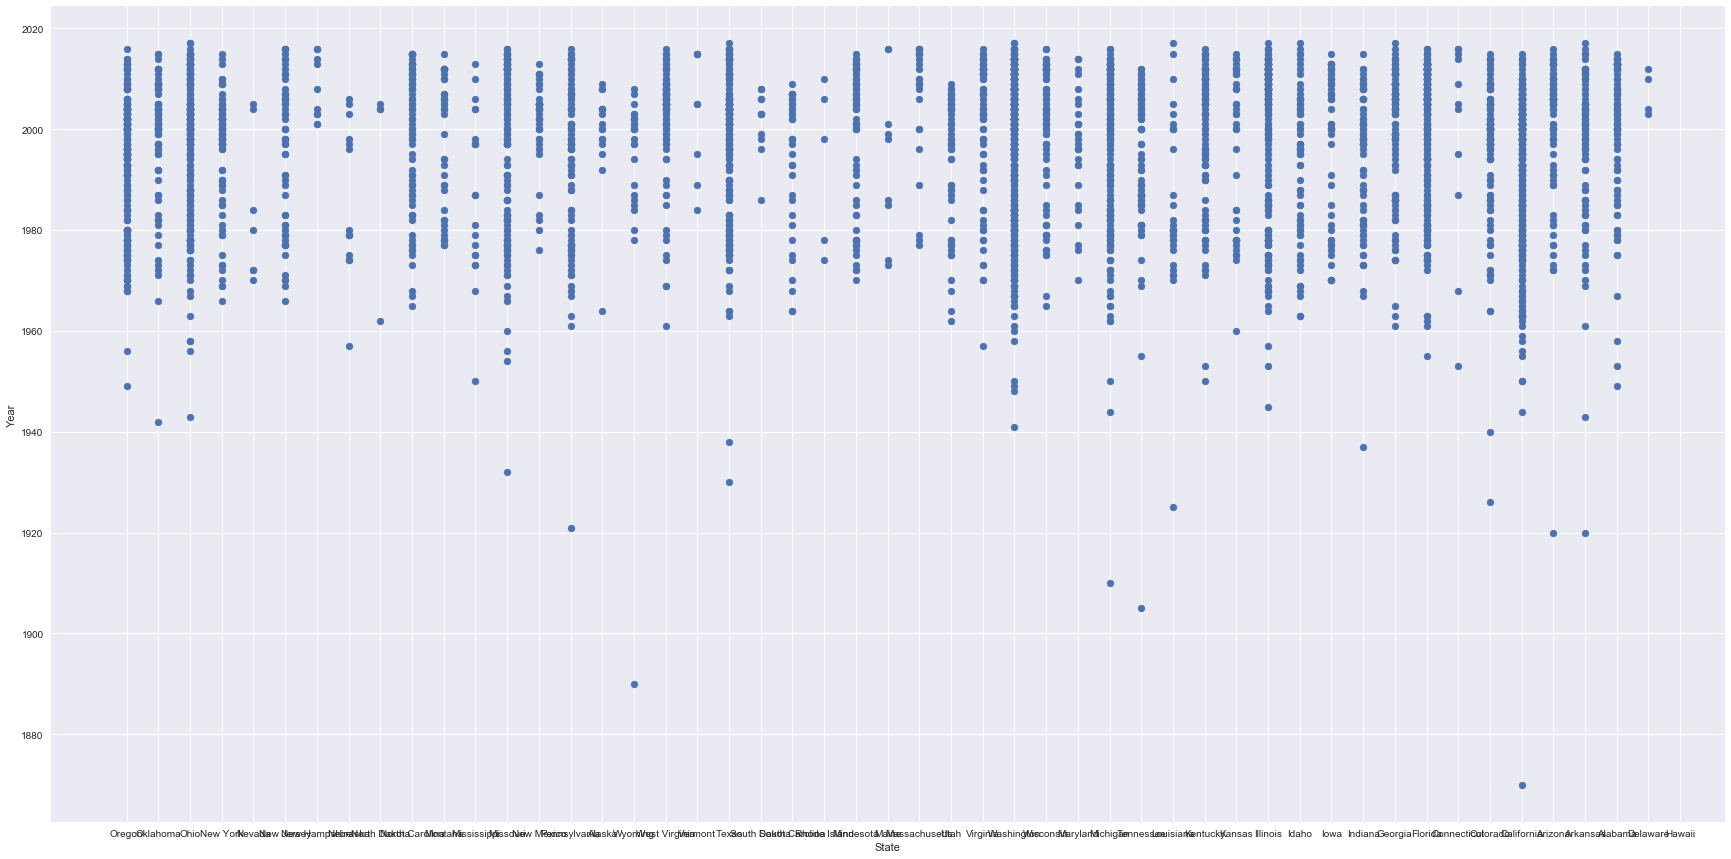

In [266]:
scatterplot(bf_df, "STATE", "YEAR", "State", "Year")

To avoid the illegibility problem, I decided to group the states by US Census Regions: Northeast, Midwest, South, and West. I did so by creating my own dataframe to merge with the bigfoot one. 

In [55]:
with open(r"state_region.csv", "r") as j:
    state_df = pd.read_csv(j)

In [56]:
#outputs the state headers to verify completeness
state_df.head()

,STATE,REGION
0,Connecticut,New England
1,Maine,New England
2,Massachusetts,New England
3,New Hampshire,New England
4,Rhode Island,New England


In [57]:
#merges the bigfoot dataframe with the state dataframe
bf_df = bf_df.merge(state_df, left_on='STATE', right_on='STATE', how='outer')

With the merge complete, I then played around with some new graphs:

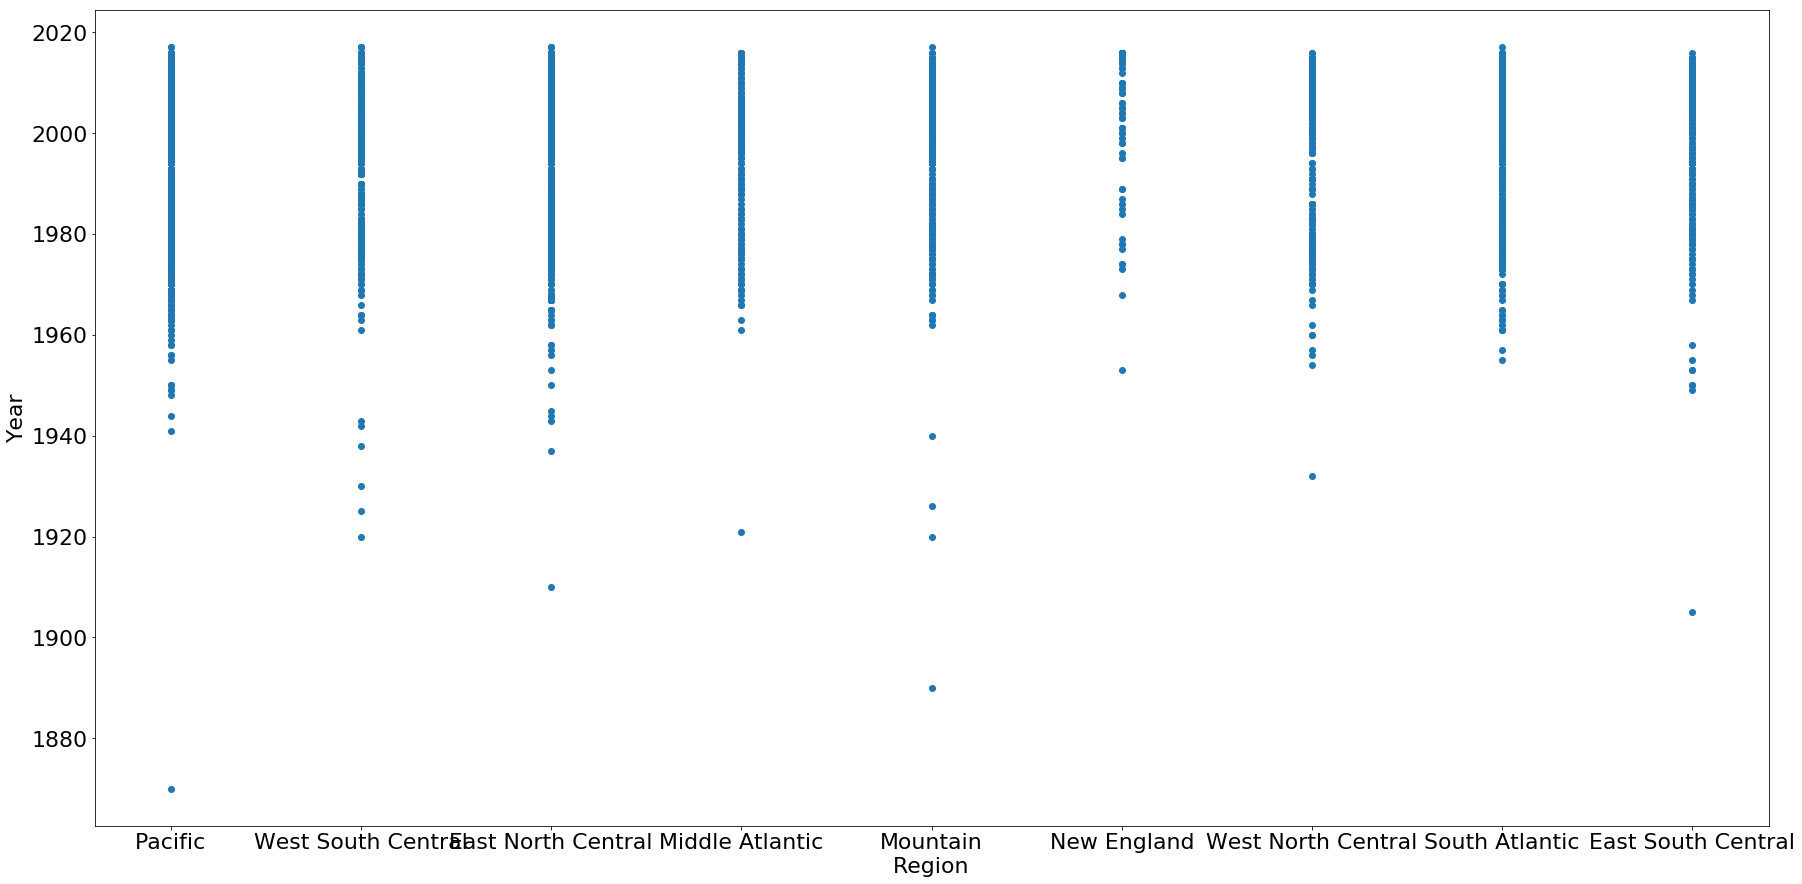

In [63]:
scatterplot(bf_df, "REGION_x", "YEAR", "Region", "Year")

The problem here is that while the axis are now legible, the data from region to region remain visually indiscernable. To deal with this issue, I used two other graphic approaches.  

In [259]:
#defines a barplot function
def barplot(data, x_column, y_height, x_label, y_label):
    #determines plot dimensions
    plt.figure(figsize=(30,15))
    #determines plot font size
    plt.rcParams.update({'font.size': 25})
    #inputs data and chooses axis
    plt.bar(x_column, y_height, data=data)
    #populates axis labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()
    
    return 

Prior to creating a barplot, I needed to find the frequency of each sighting per region. 

In [90]:
#groups by region and creates a new variable "regional_freq" containing the sum of all entries per region
bf_df['regional_freq'] = bf_df.groupby('REGION_x')['REGION_x'].transform('count')
bf_df['regional_freq'].describe()

count    4230.000000
mean      664.982506
std       320.325952
min        68.000000
25%       387.000000
50%       659.000000
75%      1113.000000
max      1113.000000
Name: regional_freq, dtype: float64

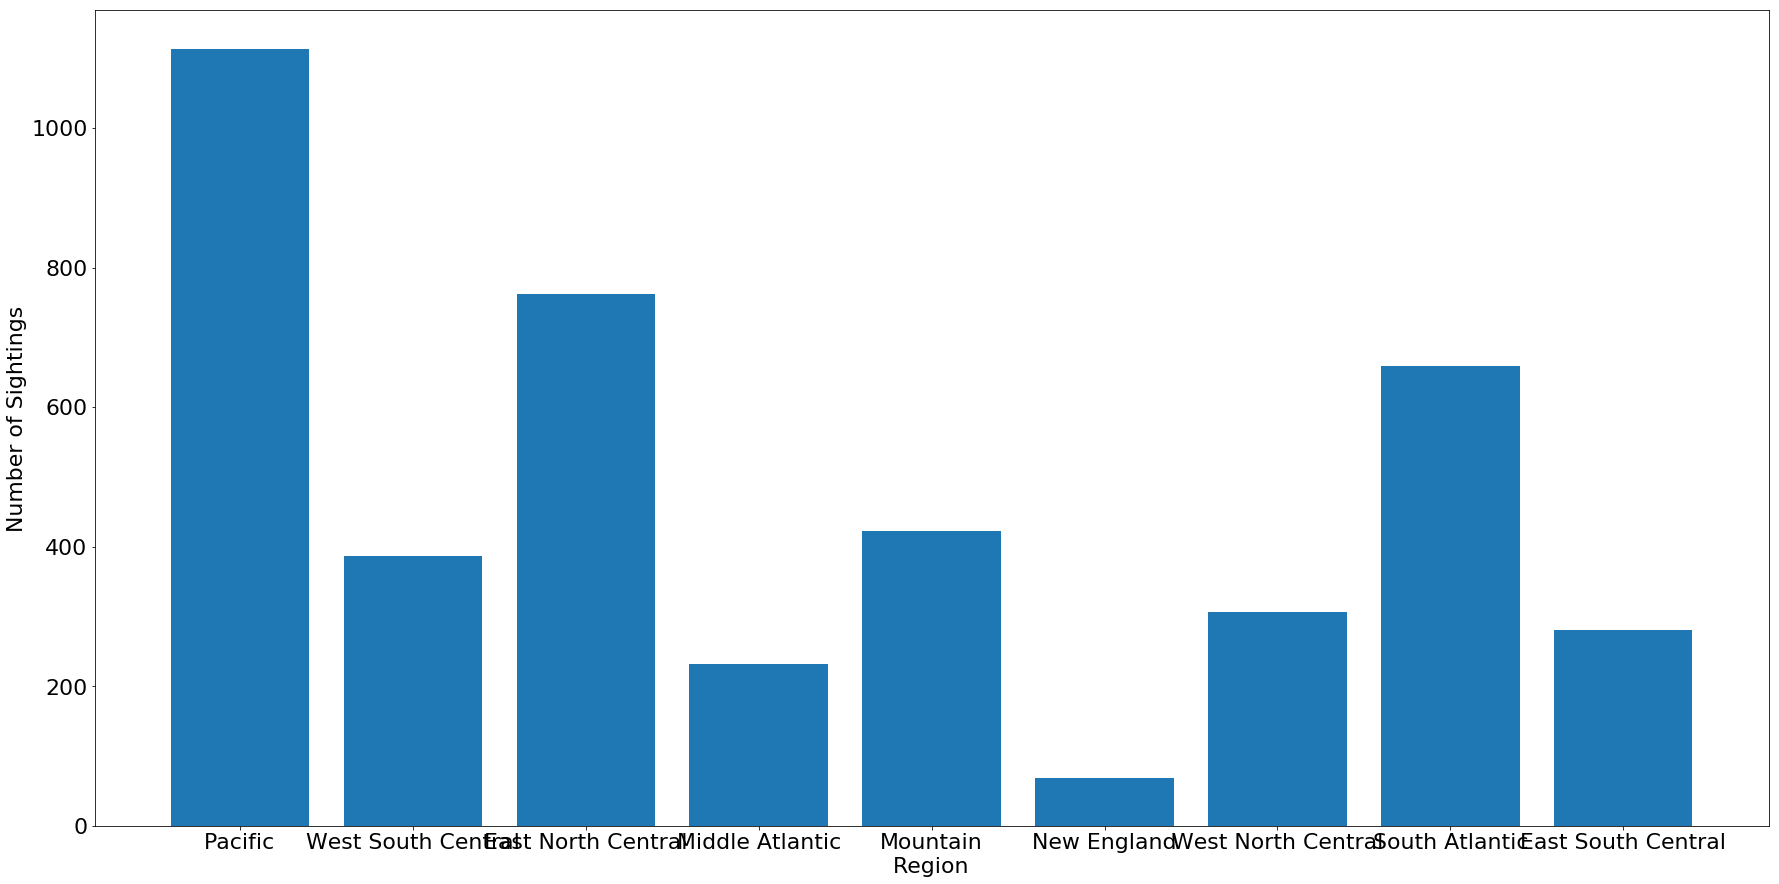

In [91]:
barplot(bf_df, "REGION_x", "regional_freq", "Region", "Number of Sightings")

Here we see that bigfoot sightings are particularly prevalent in the Pacific region which includes Alaska, California, Hawaii, Oregon, and Washington. This means citizens on the west coast must be particularly wary of bigfoot attacks. 

The next order of business was to determine whether bigfoot sightings have been more or less common in the past years: 

In [92]:
#groups by Year and creates a new variable "annual_freq" containing the sum of all entries per year
bf_df['annual_freq'] = bf_df.groupby('YEAR')['YEAR'].transform('count')
bf_df['annual_freq'].describe()

count    4228.000000
mean      105.980605
std        50.626383
min         1.000000
25%        58.000000
50%       110.000000
75%       143.000000
max       182.000000
Name: annual_freq, dtype: float64

In [204]:
#defines a hexbin plot function
def hexplot(data, x_column, y_height, x_label, y_label):
    #determines plot dimensions
    plt.figure(figsize=(20,10))
    #determines plot font size
    plt.rcParams.update({'font.size': 22})
    #inputs data and chooses axis
    plt.hexbin(x_column, y_height, data=data)
    #populates axis labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()
    
    return 

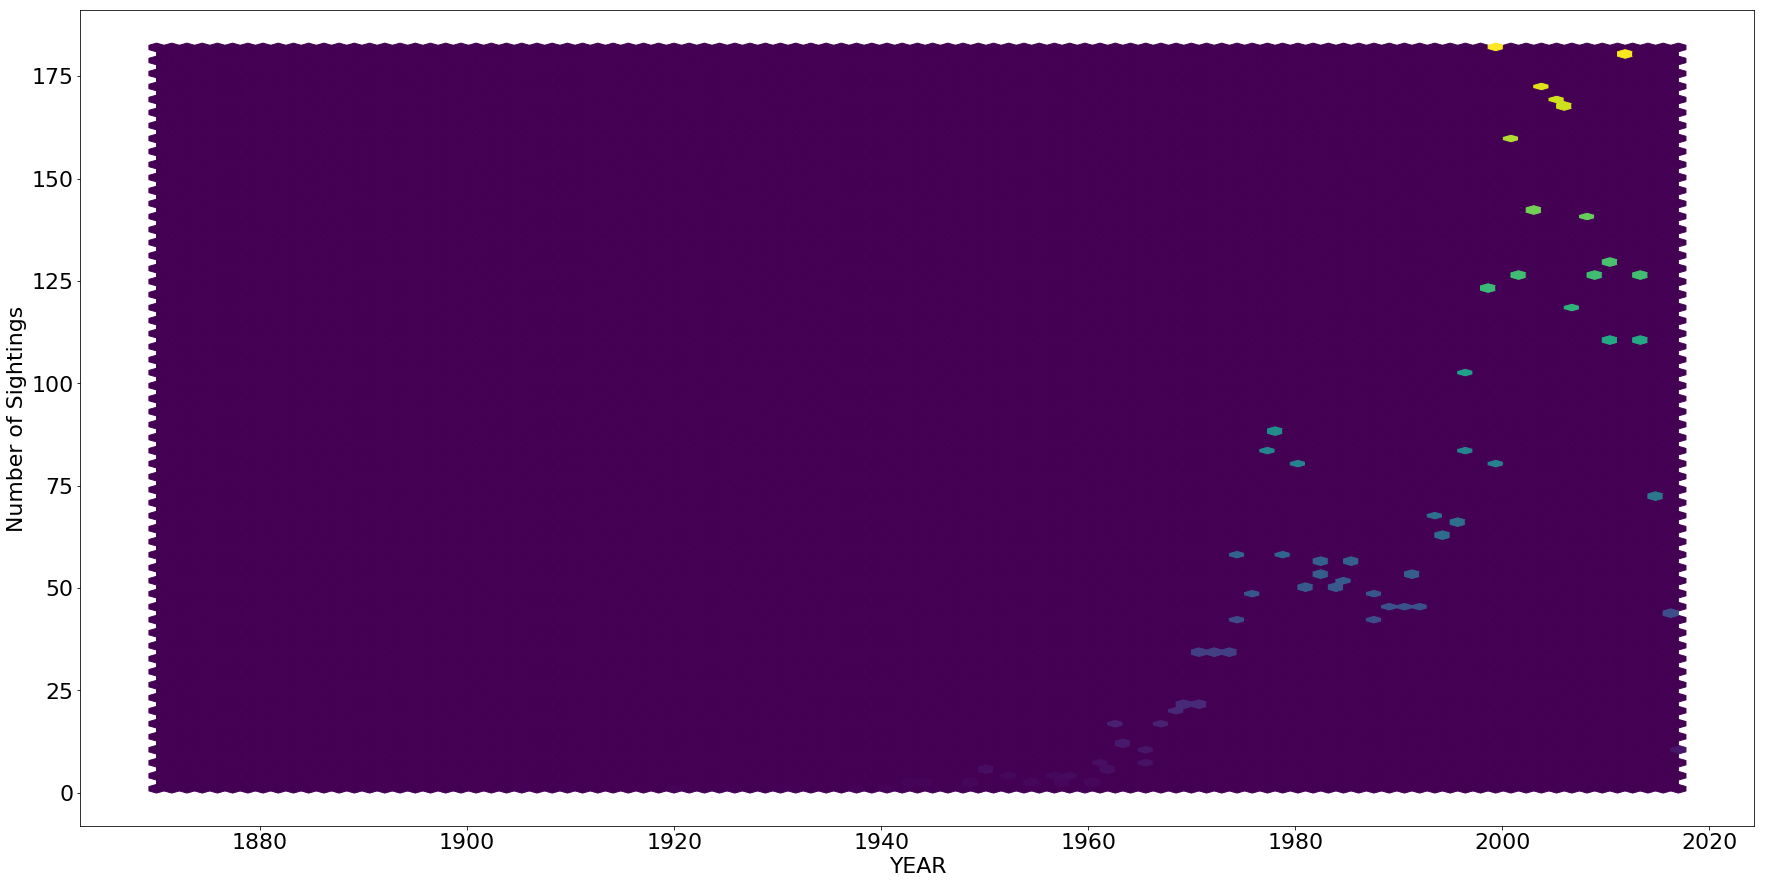

In [97]:
hexplot(bf_df, "YEAR", "annual_freq", "YEAR", "Number of Sightings")

The descriptiveness of a hexplot is limited in this context due to the low variation in the data (because we are dealing with whole numbers exclusively.) That said, it still effectively demontrates an increase in recorded sightings starting in the early 2000's. There is a dropoff in the past two years, but this is likely due to incomplete data collection. 

In [99]:
print(bf_df["REGION_x"].value_counts())

Pacific               1113
East North Central     762
South Atlantic         659
Mountain               423
West South Central     387
West North Central     306
East South Central     280
Middle Atlantic        232
New England             68
Name: REGION_x, dtype: int64


In [100]:
print(bf_df["YEAR"].value_counts())

2000.0    182
2012.0    180
2004.0    173
2005.0    169
2006.0    168
2001.0    160
2003.0    143
2008.0    140
2011.0    130
2013.0    127
2002.0    126
2009.0    126
1998.0    123
2007.0    118
2014.0    110
2010.0    110
1997.0    103
1978.0     88
1977.0     83
1996.0     83
1999.0     81
1980.0     80
2015.0     72
1993.0     67
1995.0     66
1994.0     63
1979.0     59
1975.0     58
1982.0     56
1986.0     56
         ... 
1950.0      6
1962.0      6
1958.0      5
1956.0      4
1953.0      4
1960.0      3
1949.0      3
1957.0      3
1955.0      3
1944.0      2
1920.0      2
1943.0      2
1870.0      1
1890.0      1
1910.0      1
1925.0      1
1932.0      1
1959.0      1
1945.0      1
1938.0      1
1954.0      1
1940.0      1
1926.0      1
1905.0      1
1930.0      1
1937.0      1
1948.0      1
1942.0      1
1921.0      1
1941.0      1
Name: YEAR, Length: 86, dtype: int64


## Conclusions:

The Pacific is a hotspot for bigfoot sightings. I'm certain that he spent some time in the region, likely within the last 18 years. Furthermore, the increased frequency of sightings is indicitive of heightened bigfoot activity. I would recommend that each household (particularly those in the Pacific) stock up food and construct safeplaces in anticipation of the impending human-bigfoot war. 


# Alchohol Consumption by State

I found the following data in a Washington Post article:
https://www.washingtonpost.com/news/wonk/wp/2016/12/24/where-the-heaviest-drinking-americans-live/?noredirect=on&utm_term=.4070d0f562d6

It gives the average monthly drinking rate per state for the years 2008-2009 and 2014-2015

## Reading in the Data

I scraped in the data from the Washington post website and parsed it using BeautifulSoup

In [107]:
#scrapes the html encoding off of the washington post website, feeds it into BeautifulSoup for parsing. 
site_text = requests.get("https://www.washingtonpost.com/news/wonk/wp/2016/12/24/where-the-heaviest-drinking-americans-live/?noredirect=on&utm_term=.4070d0f562d6").text
soup = BeautifulSoup(site_text, 'html.parser')


Here is the prettified file:

In [108]:
print(soup.prettify())

<!DOCTYPE html>
<html class="blog layout_article pb_actual_layout_article rendering-context-www outputtype_default-article" lang="en">
 <head>
  <script>
   window.pbDeferredScripts=window.pbDeferredScripts||new Array;
  </script>
  <script id="_$cookiemonster">
   (function(document,undefined){var wl={};wl.reg=[];wl.map=[];function CM(wlmap,wlreg){this.wl={map:wl.map.concat(wlmap||[]),reg:wl.reg.concat(wlreg||[])}}CM.prototype.ommNom=function(){return this.nom(true,undefined)};CM.prototype.allows=function(cookieKey){var yum=this.nom(false,[cookieKey]).indexOf(cookieKey)>-1;return!yum};CM.prototype.nom=function(deleteCookies,cookiesList){var unset=[];var domainkey=document.location.hostname.split("").reverse().join("").slice(0,18),dcookies=cookiesList||document.cookie.split(";"),
dcookie,save,reg;for(var i=0;i<dcookies.length,dcookie=dcookies[i];i++){save=dcookie.trim().split("\x3d")[0].toLowerCase();if(this.wl.map.indexOf(save)>-1);else unset.push(save)}for(var o=0;o<this.wl.reg.lengt

## Tabulating the Data

I tabulated the data using the pandas read_html function. It came out very nicely:

In [109]:
alchohol_table = soup.find_all('table')[0]     
alch_df = pd.read_html(str(alchohol_table))[0]

In [110]:
print(alch_df)

             State  Monthly drinking rate, 2008-2009  \
0          Alabama                             42.94   
1           Alaska                             54.52   
2          Arizona                             51.15   
3         Arkansas                             43.29   
4       California                             50.65   
5         Colorado                             62.22   
6      Connecticut                             59.32   
7         Delaware                             56.32   
8          Florida                             51.41   
9          Georgia                             48.89   
10          Hawaii                             48.23   
11           Idaho                             45.71   
12        Illinois                             54.33   
13         Indiana                             48.06   
14            Iowa                             56.70   
15          Kansas                             53.92   
16        Kentucky                             3

The data is very clean and simple and doesn't require any further preparation--There is no missing information, nor are there any outliers (likely because the data has already been curated for publication). For this reason, I played with it in some other ways. 

First, I renamed the column labels, since they are so lengthy

In [111]:
alch_df = alch_df.rename(index=str, columns={"Monthly drinking rate, 2008-2009": "Drinking_Rate_08-09", "Monthly drinking rate, 2014-2015": "Drinking_Rate_14-15"})

In [112]:
list(alch_df)

['State', 'Drinking_Rate_08-09', 'Drinking_Rate_14-15']

Next, I created a new variable that is the average of the drinking rates over the two periods (2008-2009 and 2014-2015). 
This way I have a more general drinking rate per state. 

In order to do so, I had to change the column type to int

In [113]:
#converts the drinking rate from string to integer
alch_df[['Drinking_Rate_08-09']] = alch_df[['Drinking_Rate_08-09']].apply(pd.to_numeric)

In [114]:
#creates a new column containing the average drinking rates per state
alch_df['Avg_Drinking_Rate'] = (alch_df["Drinking_Rate_08-09"] + alch_df["Drinking_Rate_14-15"])/2

## Merge with state_df for Regional Analysis
For the same reasons as I had with the previous dataset, I merged this dataset with my regional one to have legible graphs

In [121]:
#performs the merge
alch_df = alch_df.merge(state_df, left_on='State', right_on='STATE', how='outer')

In [124]:
alch_df

,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,REGION_x,STATE_y,REGION_y,STATE_x,REGION_x,STATE_y,REGION_y
0,Alabama,42.94,43.94,43.440,Alabama,East South Central,Alabama,East South Central,Alabama,East South Central,Alabama,East South Central
1,Alaska,54.52,54.98,54.750,Alaska,Pacific,Alaska,Pacific,Alaska,Pacific,Alaska,Pacific
2,Arizona,51.15,51.19,51.170,Arizona,Mountain,Arizona,Mountain,Arizona,Mountain,Arizona,Mountain
3,Arkansas,43.29,41.81,42.550,Arkansas,West South Central,Arkansas,West South Central,Arkansas,West South Central,Arkansas,West South Central
4,California,50.65,51.54,51.095,California,Pacific,California,Pacific,California,Pacific,California,Pacific
5,Colorado,62.22,59.22,60.720,Colorado,Mountain,Colorado,Mountain,Colorado,Mountain,Colorado,Mountain
6,Connecticut,59.32,60.33,59.825,Connecticut,New England,Connecticut,New England,Connecticut,New England,Connecticut,New England
7,Delaware,56.32,53.85,55.085,Delaware,South Atlantic,Delaware,South Atlantic,Delaware,South Atlantic,Delaware,South Atlantic
8,Florida,51.41,54.83,53.120,Florida,South Atlantic,Florida,South Atlantic,Florida,South Atlantic,Florida,South Atlantic
9,Georgia,48.89,48.90,48.895,Georgia,South Atlantic,Georgia,South Atlantic,Georgia,South Atlantic,Georgia,South Atlantic


This produced several more columns of data than I was concerned with, so I dropped the unnescessary columns

In [134]:
alch_df = alch_df.loc[:,~alch_df.columns.duplicated()]
alch_df

,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,REGION_x,STATE_y,REGION_y
0,Alabama,42.94,43.94,43.440,Alabama,East South Central,Alabama,East South Central
1,Alaska,54.52,54.98,54.750,Alaska,Pacific,Alaska,Pacific
2,Arizona,51.15,51.19,51.170,Arizona,Mountain,Arizona,Mountain
3,Arkansas,43.29,41.81,42.550,Arkansas,West South Central,Arkansas,West South Central
4,California,50.65,51.54,51.095,California,Pacific,California,Pacific
5,Colorado,62.22,59.22,60.720,Colorado,Mountain,Colorado,Mountain
6,Connecticut,59.32,60.33,59.825,Connecticut,New England,Connecticut,New England
7,Delaware,56.32,53.85,55.085,Delaware,South Atlantic,Delaware,South Atlantic
8,Florida,51.41,54.83,53.120,Florida,South Atlantic,Florida,South Atlantic
9,Georgia,48.89,48.90,48.895,Georgia,South Atlantic,Georgia,South Atlantic


## Missing Data
After the merge, there were "Nan" introduced into the dataset (see indeces 50-52 in the above table.) To deal with this, I simply dropped the missing data. They were the products of an outside merge and therefore inconsequential to the analysis. 

In [127]:
#drops the entry if missing values exist in the State column
alch_df = alch_df.dropna(subset=["State"])
alch_df

,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,REGION_x,STATE_y,REGION_y,STATE_x,REGION_x,STATE_y,REGION_y
0,Alabama,42.94,43.94,43.440,Alabama,East South Central,Alabama,East South Central,Alabama,East South Central,Alabama,East South Central
1,Alaska,54.52,54.98,54.750,Alaska,Pacific,Alaska,Pacific,Alaska,Pacific,Alaska,Pacific
2,Arizona,51.15,51.19,51.170,Arizona,Mountain,Arizona,Mountain,Arizona,Mountain,Arizona,Mountain
3,Arkansas,43.29,41.81,42.550,Arkansas,West South Central,Arkansas,West South Central,Arkansas,West South Central,Arkansas,West South Central
4,California,50.65,51.54,51.095,California,Pacific,California,Pacific,California,Pacific,California,Pacific
5,Colorado,62.22,59.22,60.720,Colorado,Mountain,Colorado,Mountain,Colorado,Mountain,Colorado,Mountain
6,Connecticut,59.32,60.33,59.825,Connecticut,New England,Connecticut,New England,Connecticut,New England,Connecticut,New England
7,Delaware,56.32,53.85,55.085,Delaware,South Atlantic,Delaware,South Atlantic,Delaware,South Atlantic,Delaware,South Atlantic
8,Florida,51.41,54.83,53.120,Florida,South Atlantic,Florida,South Atlantic,Florida,South Atlantic,Florida,South Atlantic
9,Georgia,48.89,48.90,48.895,Georgia,South Atlantic,Georgia,South Atlantic,Georgia,South Atlantic,Georgia,South Atlantic


In [ ]:
alch_df['regional_avg'] = alch_df.groupby('STATE')['STATE'].transform('count')

In [135]:
alch_df.groupby("REGION_x").count()

,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,STATE_y,REGION_y
REGION_x,,,,,,,
East North Central,5,5,5,5,5,5,5
East South Central,4,4,4,4,4,4,4
Middle Atlantic,3,3,3,3,3,3,3
Mountain,8,8,8,8,8,8,8
New England,6,6,6,6,6,6,6
Pacific,5,5,5,5,5,5,5
South Atlantic,8,8,8,8,8,8,8
West North Central,7,7,7,7,7,7,7
West South Central,4,4,4,4,4,4,4


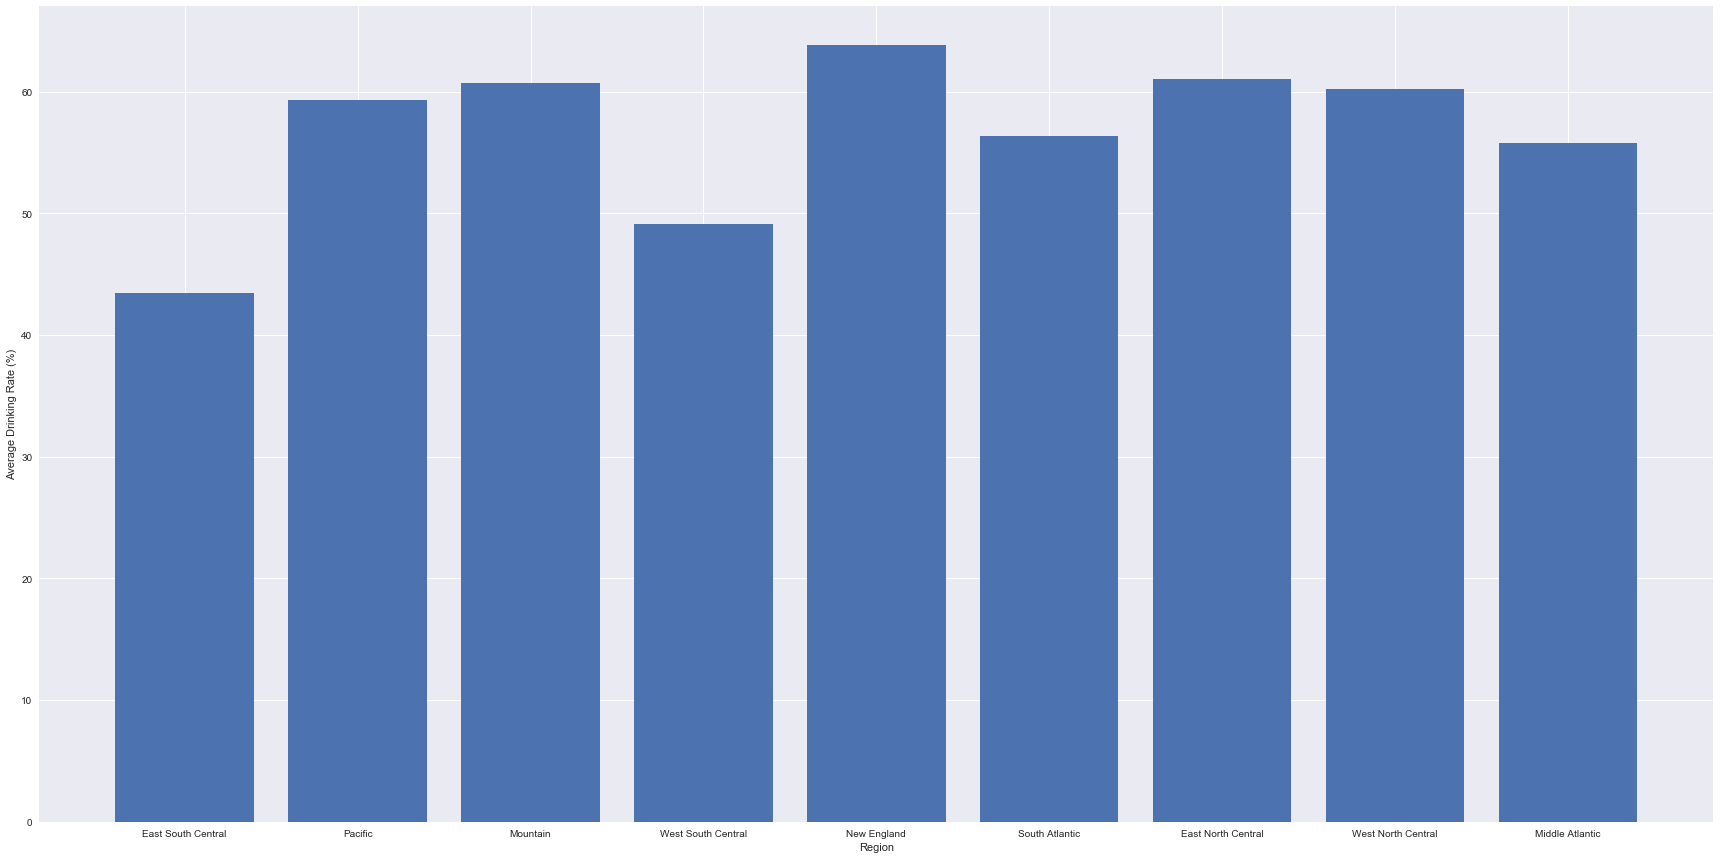

In [186]:
barplot(alch_df, "REGION_x", "Avg_Drinking_Rate", "Region", "Average Drinking Rate (%)")

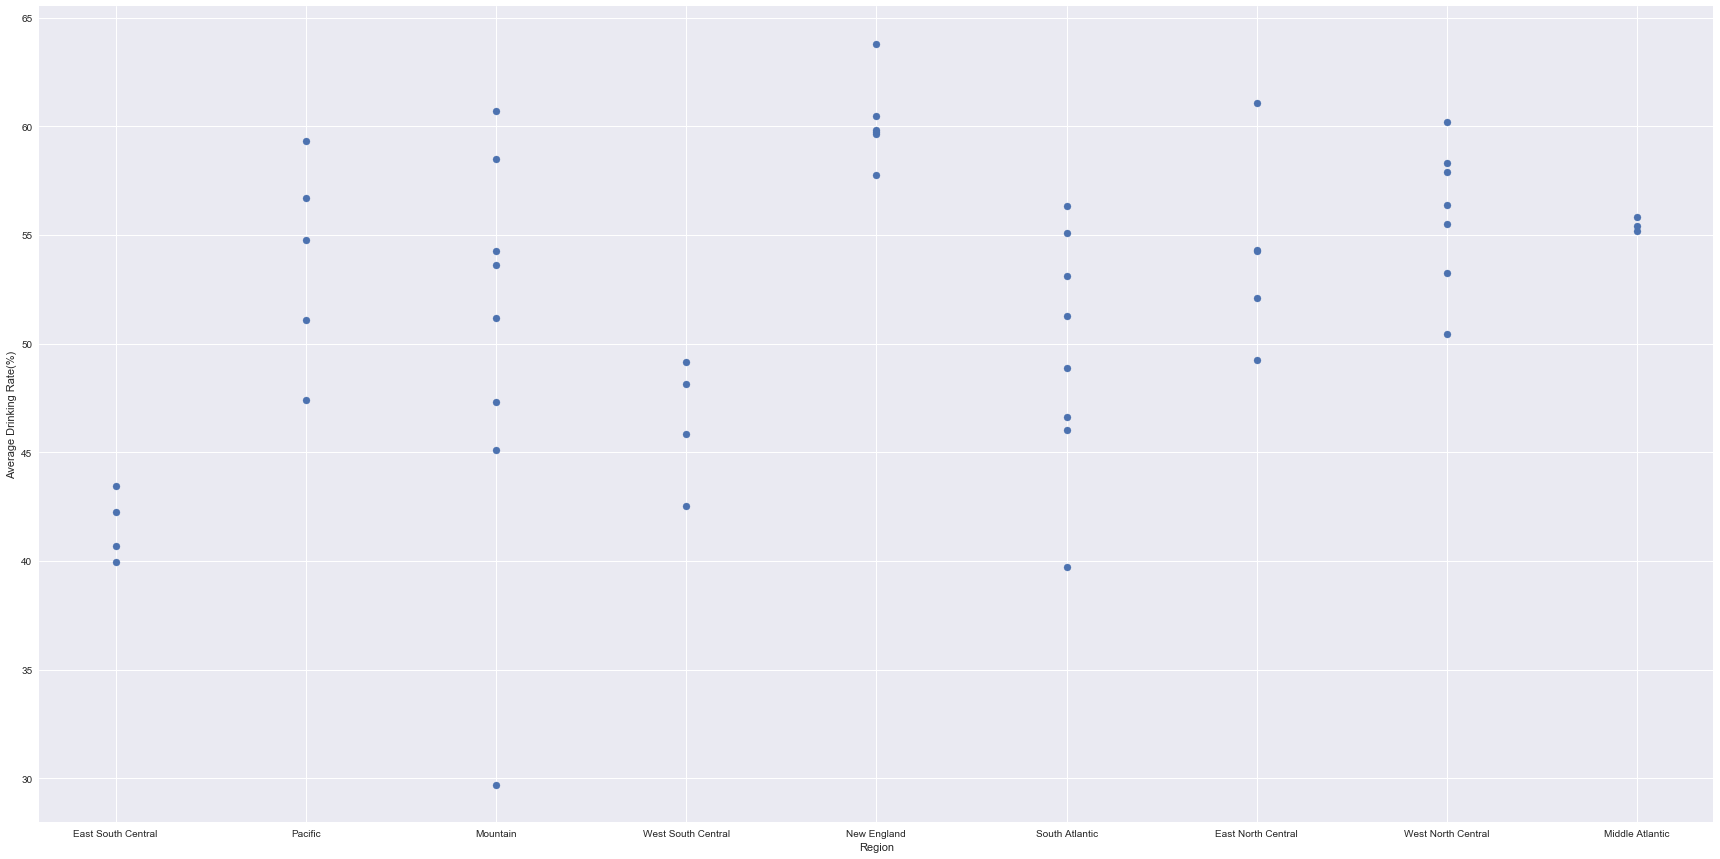

In [187]:
scatterplot(alch_df, "REGION_x", "Avg_Drinking_Rate", "Region", "Average Drinking Rate(%)")

## Merge with Bigfoot dataset
I hope you saw this coming, but the next natural step to working with alchohol consumption datasets and bigfoot sightings datasets is to put them together.

In [141]:
#performs an outer merge on the state variable
bf_df = bf_df.merge(alch_df, left_on='STATE', right_on='STATE_x', how='outer')
#drops merge duplicates
bf_df = bf_df.loc[:,~bf_df.columns.duplicated()]
bf_df

,ALSO_NOTICED,A_&_G_References,COUNTY,DATE,ENVIRONMENT,LOCATION_DETAILS,MONTH,NEAREST_ROAD,NEAREST_TOWN,OBSERVED,...,Drinking_Rate_14-15_y,Avg_Drinking_Rate_y,STATE_x_y,STATE_y_y,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,STATE_y
0,Not sure. It took me a full 5 years to be able...,NaN,Yamhill County,NaN,Gravel logging road. Very dense fir forests. B...,"Logging roads north west of Yamhill, OR, about...",May,NW Fairdale,Yamhill,It was May 1984. Two friends and I were up in ...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
1,NaN,NaN,Washington County,NaN,NaN,"A farm near David's Hill, Forest Grove, Oregon...",March,NaN,NaN,"Richard H., an older farmer and a singularly t...",...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
2,See main report,NaN,Wallowa County,1 or 2,Broad ridgeline covered with bushes (sagebrush...,I was lost somewhere in the mountains and do n...,July,State Highway 82,Joseph,BIGFOOT SIGHTING By:\tJim Kiser Sighting date:...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
3,NaN,NaN,Umatilla County,NaN,The area is in the middle of the Umatilla Nati...,"Beginning from Pilot Rock, Oregon, go south on...",August,Rocky Ridge Road,"Pilot Rock, Oregon",My stories begin in the mid 70's at Indian Lak...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
4,NaN,NaN,Tillamook County,NaN,Very dense forest consisting of various decidu...,Along the Wilson River a mile or so below the ...,NaN,NaN,NaN,I already submitted a report of this incident ...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
5,NaN,NaN,Polk County,20,Heavy pine forest thick with high Buck Brush a...,About five miles south of Hwy 22 on an old log...,October,Hwy 22,"Dallas, OR",I felt uneasy the entire morning. I felt as if...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
6,NaN,"Oregon DeLorme Atlas Pg. 61, A6 Topozone",Multnomah County,Forgotten,A meadow above and east of the Sandy River and...,From Mt. Hood the Sandy River flows due west t...,July,Gordon Creek Road,Troutdale Oregon,The Sandy River originates high on the slopes ...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
7,none,NaN,Morrow County,7-8pm,"Right in the middle of the road , dark so no l...",Drive straight east from Portland along Oregon...,March,Can not remember road#,"largetown Portland, smalltown? (Boardman)","In the early spring of 1995, a friend of mine ...",...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
8,NaN,NaN,Marion County,NaN,The area is an old access road in a heavily fo...,Take the Little North Fork Rd towards the Ceda...,NaN,"Little North Fork Rd., on the Pearl Crk Guard ...","Gates, Oregon",I was a Deputy Sheriff for Marion County from ...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon
9,NOTHING WAS HEARD BUT I FOUND IT STRANGE THAT ...,NaN,Marion County,JULY,THE RIVER BOTTOM IS ROCK. THE ONLY STRUCTURE ...,THE PUDDING RIVER IS EAST OF MT ANGEL. FOREST...,July,Meridian Rd.,Silverton,MY WIFE'S GRANDFATHER WANTED TO TAKE ME FLY FI...,...,58.85,59.310,Oregon,Oregon,Oregon,59.77,58.85,59.310,Oregon,Oregon


In [158]:
#creates the frequency of sitings by state
bf_df['state_freq'] = bf_df.groupby('STATE_x')['STATE_x'].transform('count')


In [268]:
bf_df = bf_df.dropna(subset=["Avg_Drinking_Rate", "state_freq"])

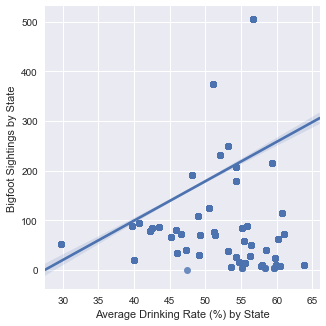

In [202]:
ax = sns.lmplot(x="Avg_Drinking_Rate", y="state_freq", data=bf_df )
ax.set(xlabel='Average Drinking Rate (%) by State', ylabel='Bigfoot Sightings by State')

## Checking for Outliers in State_freq
Because it was a new variable, I hadn't yet checked for outliers in the freqency of bigfoot sightings by state variable ("state_freq".) And, as the previous graph demonstrates, It carried significant weight in the regression. Due to the problems surrounding data collection methods for bigfoot sightings, it wouldn't be surprising if some states were disproportionately represented. I will check to see if the highest state_freq entry is outside 3 standard deviations from the mean. 

In [175]:
#find standard deviation for the state frequency dataset
std_state_freq = bf_df['state_freq'].std()
max_outlier_freq_value = bf_df['state_freq'].mean() + (std_state_freq * 3)

max_outlier_freq_value

641.5877963470372

In [185]:
bf_df['state_freq'].max()

505

Here we see that all of the data are within 3 standard deviations from the mean. 

In [184]:
bf_df[bf_df['state_freq']>500]

,ALSO_NOTICED,A_&_G_References,COUNTY,DATE,ENVIRONMENT,LOCATION_DETAILS,MONTH,NEAREST_ROAD,NEAREST_TOWN,OBSERVED,...,STATE_x_y,STATE_y_y,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,STATE_y,state_freq,freq
1695,NaN,"Pg. 36, B1",Yakima County,NaN,My mother stated that they were picknicking in...,It happened in the foothills of Mt. Adams at t...,NaN,NaN,NaN,My mother related the story to me in 1969. I ...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1696,"Then about a week later, my husband was coming...","Pg. 50, C3",Yakima County,NaN,NaN,Along the Naches River,August,NaN,NaN,Laurie Durrell Duyck by way of Linda Durrell M...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1697,"One thing that is curious, did the sound of my...","Pg. 49, D7",Yakima County,First week,Location already stated above. The flora was t...,"North slope of Divide Ridge, South of Rimrock ...",November,NaN,NaN,I will begin by saying that I am an avid extre...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1698,Bird flying overhead seeming to be protective ...,"Pg. 49, B6",Yakima County,13,Forest.,Unmarked campsite on right side just past the ...,June,FR 174,Cliffdell,We showed up and set up camp around 5:00pm. St...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1699,Of special interest to us is the noise of the ...,"Pg. 49, B6",Yakima County,21,"This area was a pine and fir forest, scrubby h...","From Naches, Wa, head west on Highway 410 towa...",July,FR 162,Cliffdale,"While on a family camping trip this summer, my...",...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1700,Dead quiet around the time of the scream.,NaN,Yakima County,25,The environment is a rugged mountain type regi...,"From Western Washington, take state hwy. 410 o...",July,410 Highway.,American River,"My nephew, his girlfriend and I were camping a...",...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1701,NaN,"Pg. 49, A7",Yakima County,28,Thick Douglas Fir forest with some cedars. Cre...,"On the Bumping Lake Rd, 3/4 of a mile up the t...",October,Bumping Lake rd,Goose Prarie,First of all I don't know if this incident is ...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1702,NaN,NaN,Yakima County,June 11,Thick forest,NaN,June,Mt. Adams Hwy,Glenwood,June 11th. 6:00 pm. Witnessed large creature c...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1703,The lack of animals in the area . . . for the ...,NaN,Yakima County,29,"4,000 foot level, below Cliffs above Rimrock L...",Logging road above Rimrock Lake.,October,Hwy 12,Yakima,Elk Camp 2001 . . . VERY LOUD and LONG VOLCALI...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505
1704,it was big walked like a man.never thyed to hu...,NaN,Yakima County,NaN,lots of cotten wood trees by the river thickly...,parker washington out side of yakima washington,August,the old yakima road to wapato,parker out side of yakima,when i was a kid we lived out side of yakima o...,...,Washington,Washington,Washington,56.13,57.26,56.695,Washington,Washington,505,505


The max (Washington) had 505 sightings. However, as the following box and whisker plot demonstrates, that is right on the edge of a whisker. 

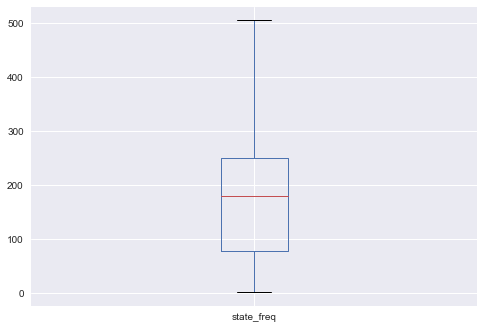

In [176]:
bbox = bf_df['state_freq'].plot(kind="box")

Washington is awfully close to being an outlier by some metrics, but remains within a reasonably explainable range. I will, therefore, keep it in the dataset. That set, the regression produced in the former scatterplot should be analyzed with this key point in mind. That said, I still like the implications of the regression (however imperfect it may be.)

In [ ]:
bf_df['freq'].describe()

## Conclusion
Though this data set is far from comprehensive, it is suggestive of a correlation between drinking and bigfoot sightings. Maybe we should be less concerned about a big foot war and more concerned with drinking habits. Of course this analysis tells us little to nothing, but it is fun to find near spurious correlation nonetheless. 

# Haunted Locations Data
Continuing with this spooky theme, the next dataset is a collection of haunted locations throughout the United States.

In [188]:
with open("haunted_places.csv", encoding="utf8") as f:
    haunted_df = pd.read_csv(f)

In [189]:
haunted_df.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


In [244]:
haunted_df.count()

city              10989
country           10992
description       10992
location          10989
state             10992
state_abbrev      10992
longitude          9731
latitude           9731
city_longitude    10963
city_latitude     10963
dtype: int64

It contains the city, state, and latitude and longitude of haunted locations across the United States

In [195]:
haunted_df["country"].unique()


array(['United States'], dtype=object)

Yes, just the United States. 

In [200]:
len(haunted_df["state"].unique())


51

In [201]:
haunted_df["state"].unique()

array(['Michigan', 'Pennsylvania', 'California', 'Massachusetts',
       'Arkansas', 'Oregon', 'Arizona', 'Maryland', 'Oklahoma', 'Maine',
       'Alaska', 'Louisiana', 'Alabama', 'Ohio', 'New Jersey',
       'Washington DC', 'North Dakota', 'Wyoming', 'North Carolina',
       'Kentucky', 'Kansas', 'New York', 'Wisconsin', 'Iowa',
       'West Virginia', 'New Mexico', 'Washington', 'Illinois', 'Indiana',
       'Virginia', 'Idaho', 'New Hampshire', 'Vermont', 'Nevada',
       'Hawaii', 'Utah', 'Nebraska', 'Georgia', 'Texas', 'Montana',
       'Tennessee', 'Florida', 'Missouri', 'Delaware', 'South Dakota',
       'Mississippi', 'Connecticut', 'Minnesota', 'South Carolina',
       'Rhode Island', 'Colorado'], dtype=object)

This dataset includes Washington DC as well

## Data Cleaning


### Missing Data

In [239]:
haunted_df.columns[haunted_df.isnull().any()]


Index(['city', 'location', 'longitude', 'latitude', 'city_longitude',
       'city_latitude'],
      dtype='object')

In [240]:
#outputs the quantity of na values in the longitude column
haunted_df["city_longitude"].isna().sum()

29

In [241]:
#outputs the quantity of na values in the latitude column
haunted_df["city_latitude"].isna().sum()

29

In [243]:
#outputs the quantity of na values in the city column
haunted_df["city"].isna().sum()

3

Because there are 29 missing coordinates out of ~10000 entries, and because they are roughly randomly selected, I don't take issue with dropping them, particularly due to the arbitrary nature of this dataset. 

In [245]:
haunted_df = haunted_df.dropna(subset=["city_longitude"])

In [246]:
haunted_df["city_longitude"].isna().sum()

0

### Outliers
Using Data from http://en.wikipedia.org/wiki/Extreme_points_of_the_United_States#Westernmost, below are the most extreme lattitude and longitude points of the US. I can determine if latitudes and longitudes are outliers if they are not within this range. 

top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

In [223]:
#creates a list of entries with latitude or longitude coordinates outside of the continental parameters I found. 
max_outlier_lat = [lat for lat in haunted_df['city_latitude'] if lat > 49.3457868]
max_outlier_long = [long for long in haunted_df['city_longitude'] if long > -66.9513812]
min_outlier_lat = [lat for lat in haunted_df['city_latitude'] if lat < 24.7433195]
min_outlier_long = [long for long in haunted_df['city_longitude'] if long < -124.7844079]

#outputs the length of each list
print(len(max_outlier_lat))
print(len(max_outlier_long))
print(len(min_outlier_lat))
print(len(min_outlier_long))

32
0
101
128


So there are a number of entries outside of the latitude and longitudinal parameters of the US. However, this may be because they are in Hawaii or Alaska. I will check.


In [232]:
#outputs the states in which the latitude listing exceeds the northernmost extreme
haunted_df[haunted_df['city_latitude']>49.3457868]["state"].unique()

array(['Alaska'], dtype=object)

As suspected, all of the northernmost extremes in latitude were Alaska. Now to check the other outliers.


In [233]:
#outputs the states in which the latitude listing is less than the southernmost extreme
haunted_df[haunted_df['city_latitude']<24.7433195]["state"].unique()

array(['Hawaii', 'Florida'], dtype=object)

In [235]:
#outputs the states in which the longitude listing is less than the easternmost extreme
haunted_df[haunted_df['city_longitude']<-124.7844079]["state"].unique()

array(['Alaska', 'Hawaii'], dtype=object)

Here we see that the other extremes are found in Hawaii and Florida. These are both acceptable to me; the extremes are all plausible given the error prone parameters I pulled off of wikipedia. In other words, I think the data is clean. 

## Data Visualization
There are 3 ways I'd like to visualize the data. The first is a hexplot of the continental US. To do so, I configured the hexplot function to stay limited to the continental latitudonal and longitudonal parameters I identified earlier. 

In [210]:
#defines a hexbin plot function with adapted dimensions for the continental United States
def hexplot(data, x_column, y_height, x_label, y_label):
    #determines plot dimensions
    plt.figure(figsize=(20,10))
    #determines plot font size
    plt.rcParams.update({'font.size': 22})
    #inputs data and chooses axis
    plt.hexbin(x_column, y_height, data=data)
    #populates axis labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.xlim((-126,-65))
    plt.ylim((24,50))
    plt.show()
    
    return 

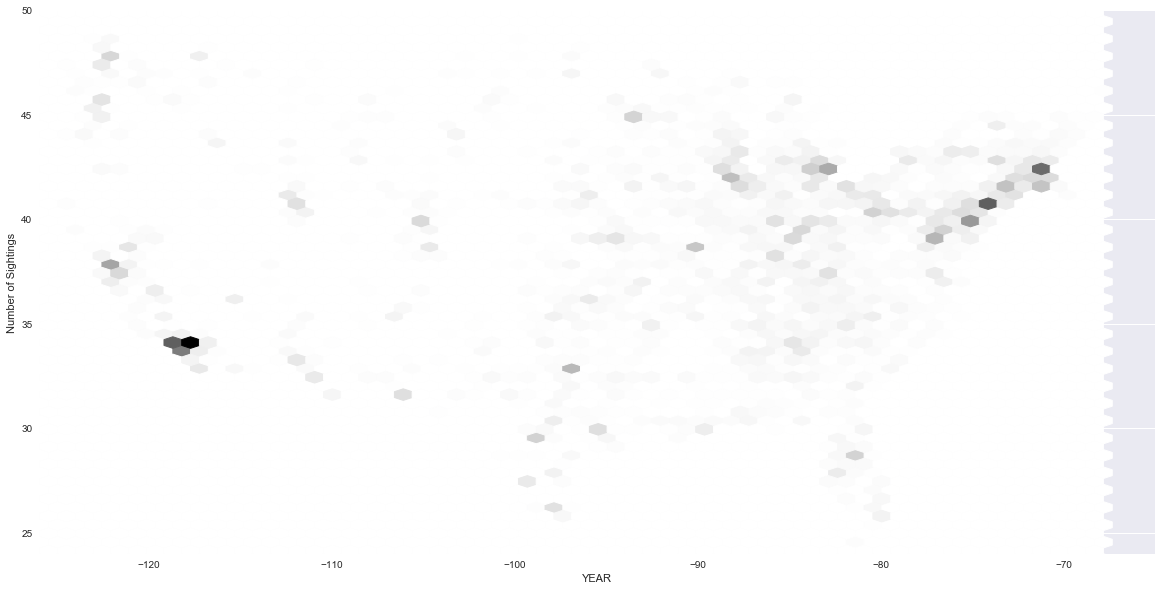

In [218]:
hexplot(haunted_df, "city_longitude", "city_latitude", "YEAR", "Number of Sightings")

The map makes it clear that haunted locations are most densely clustered in the New England Area (probably drawing upon Puritan legends, etc,) and Southern California. 

Again, I'll merge it with the regional data for regional evaluation

In [249]:
#merges the haunted dataframe with the state dataframe
haunted_df = haunted_df.merge(state_df, left_on='state', right_on='STATE', how='outer')

In [255]:
#drops missing merge values
haunted_df["REGION_x"].unique()
haunted_df = haunted_df.dropna(subset=["REGION_x"])

In [256]:
#groups by region and creates a new variable "regional_freq" containing the sum of all entries per region
haunted_df['regional_freq'] = haunted_df.groupby('REGION_x')['REGION_x'].transform('count')

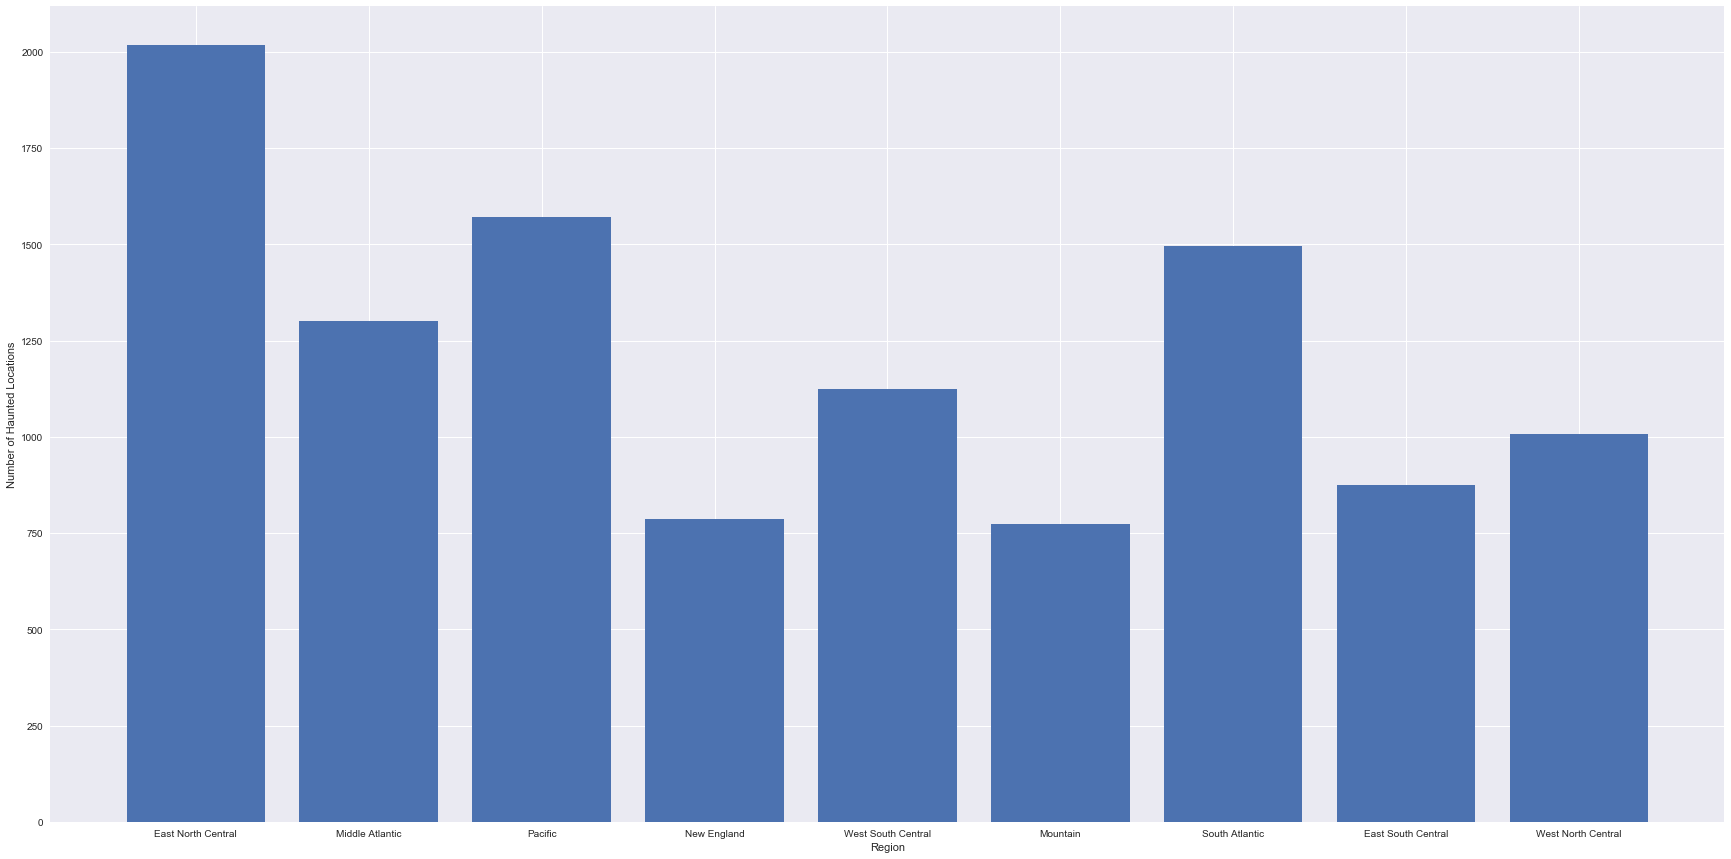

In [260]:
barplot(haunted_df, "REGION_x", "regional_freq", "Region", "Number of Haunted Locations")

Here we see the distribution of Haunted locations favors the East North Central and Pacific Regions, not unlike what our hexplot suggested. However we see that despite having some of the most densely clustered locations, New England actually has relatively less haunted locations. 

In [262]:
haunted_df = haunted_df.merge(alch_df, left_on='state', right_on='State', how='outer')

In [263]:
#groups by region and creates a new variable "regional_freq" containing the sum of all entries per region
haunted_df['state_freq'] = haunted_df.groupby('state')['state'].transform('count')

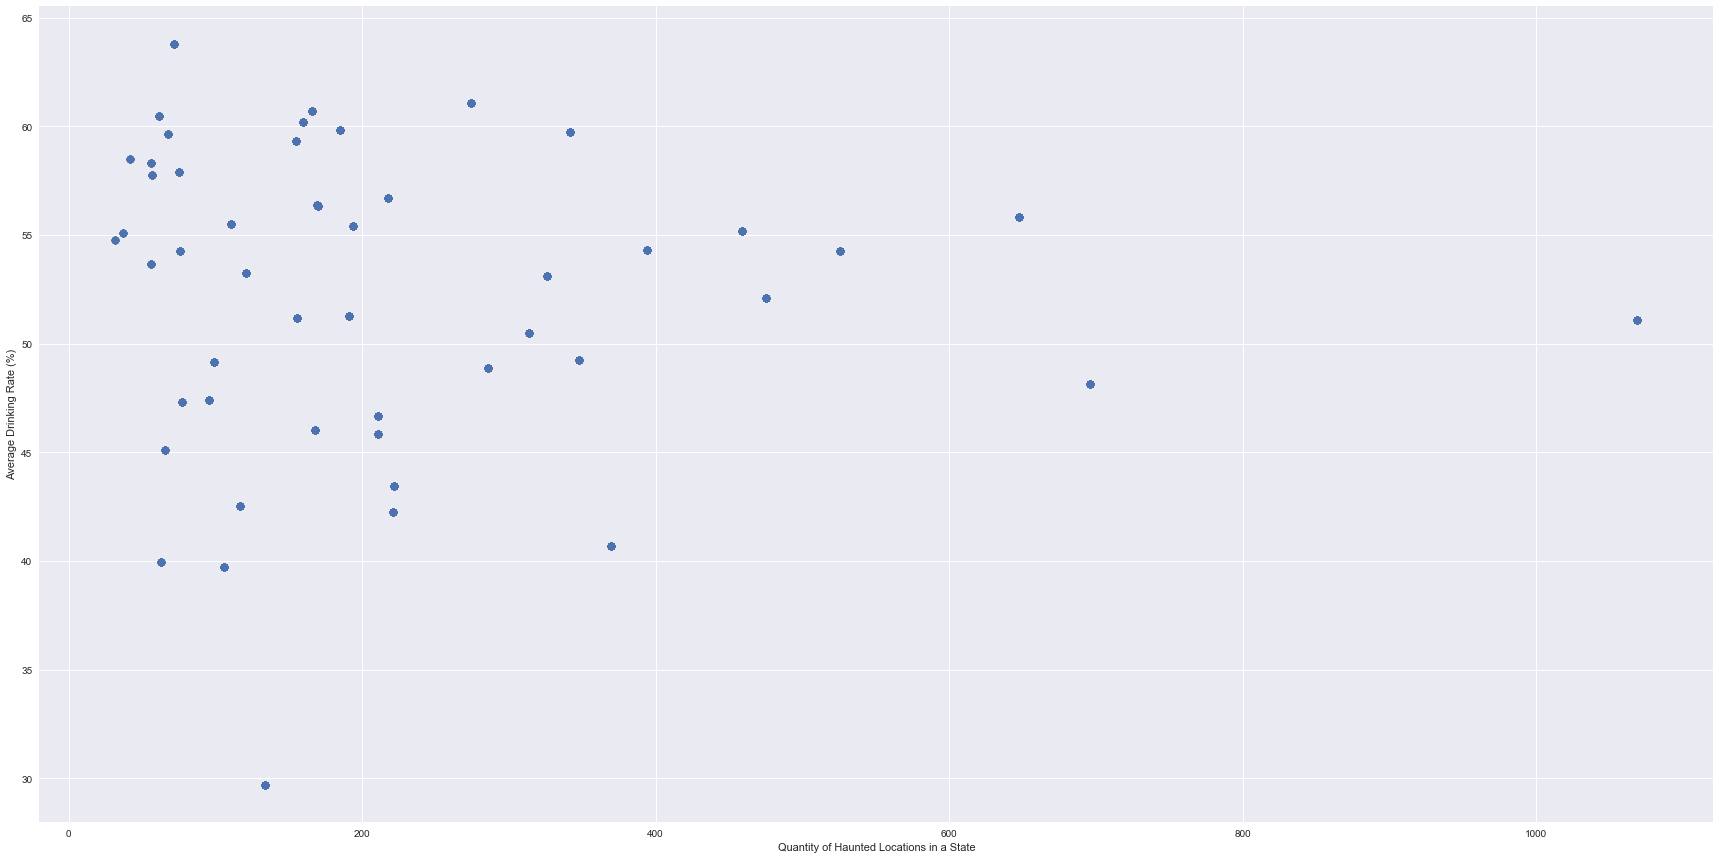

In [267]:
scatterplot(haunted_df, "state_freq", "Avg_Drinking_Rate", "Quantity of Haunted Locations in a State", "Average Drinking Rate (%)")

There doesnt appear to be any correlation worth mapping. Apparently proximity to haunted locations doesnt drive people to drinking. 
## Conclusion
The hexplot is a phenomenal way to visualize parameterized/region specific data. However, it doesn't tell the full story, as we saw in the case of New England. Southern California, and the North East Central Region are extremely spooky and should be avoided at all costs. 